In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# load data and get sample
df = pd.read_csv('Pokemon.csv')
df.sample(6)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
638,577,Solosis,Psychic,NaN,290,45,30,40,105,50,20,5,False
597,537,Seismitoad,Water,Ground,509,105,95,75,85,75,74,5,False
701,640,Virizion,Grass,Fighting,580,91,90,72,90,129,108,5,True
296,273,Seedot,Grass,NaN,220,40,40,50,30,30,30,3,False
511,460,AbomasnowMega Abomasnow,Grass,Ice,594,90,132,105,132,105,30,4,False
255,236,Tyrogue,Fighting,NaN,210,35,35,35,35,35,35,2,False


In [3]:
# get statistics // this omits categorical variables by default
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [4]:
# drop unnecessary columns // axis=1 for columns // inplace=True to modify df directly
df.drop(['Name','Type 1','Type 2','Generation','Legendary'], axis=1, inplace=True)


In [5]:
# check new dataframe
df.sample(5)

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
456,411,495,60,52,168,47,138,30
756,686,288,53,54,53,37,46,45
694,633,300,52,65,50,45,50,38
217,202,405,190,33,58,33,58,33
431,386,600,50,95,90,95,90,180


In [ ]:
# display numerical correlation between features by strength
df.corr()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,1.000000,0.119813,0.097614,0.102298,0.094786,0.088759,0.085817,0.010733
Total,0.119813,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943
HP,0.097614,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952
Attack,0.102298,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240
Defense,0.094786,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227
Sp. Atk,0.088759,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018
Sp. Def,0.085817,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133
Speed,0.010733,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000


In [7]:
# choose the most correlated features
df.drop(['#'], axis=1, inplace=True)

In [9]:
df.head(6)

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,318,45,49,49,65,65,45
1,405,60,62,63,80,80,60
2,525,80,82,83,100,100,80
3,625,80,100,123,122,120,80
4,309,39,52,43,60,50,65
5,405,58,64,58,80,65,80


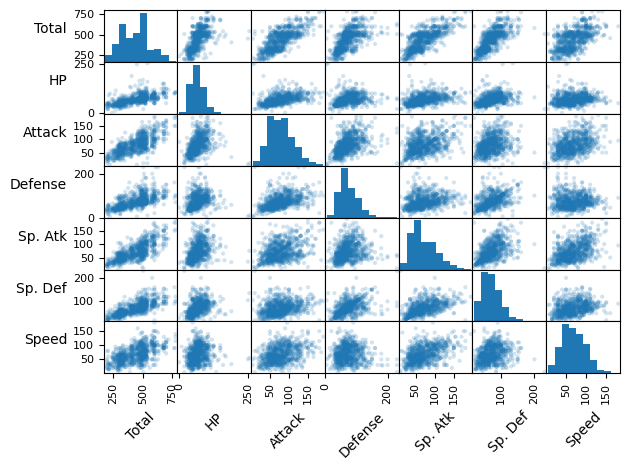

In [20]:
# plot a scatter matrix
axes = pd.plotting.scatter_matrix(df, alpha=0.2)

# rotate labels so we can read them
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

# adjust spacing
plt.tight_layout()
plt.gcf().subplots_adjust(hspace=0, wspace=0)
plt.show()


In [22]:
# extracting input and output variables
X = df.iloc[:, 1:7].to_numpy()
y = df.iloc[:, 0].to_numpy()

In [28]:
from sklearn import preprocessing

# init scaler obj & standardize X (features)
std_scaler = preprocessing.StandardScaler()
X_std = std_scaler.fit_transform(X)

# visualize standardized vs non standardized data statistics
display(pd.DataFrame(X_std).describe().round(2))
display(pd.DataFrame(X).describe().round(2))

,0,1,2,3,4,5
count,800.00,800.00,800.00,800.00,800.00,800.00
mean,-0.00,0.00,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.67,-2.28,-2.21,-1.92,-1.87,-2.18
25%,-0.75,-0.74,-0.77,-0.71,-0.79,-0.80
50%,-0.17,-0.12,-0.12,-0.24,-0.07,-0.11
75%,0.42,0.65,0.52,0.68,0.65,0.75
max,7.28,3.42,5.01,3.71,5.68,3.85


,0,1,2,3,4,5
count,800.00,800.00,800.00,800.00,800.00,800.00
mean,69.26,79.00,73.84,72.82,71.90,68.28
std,25.53,32.46,31.18,32.72,27.83,29.06
min,1.00,5.00,5.00,10.00,20.00,5.00
25%,50.00,55.00,50.00,49.75,50.00,45.00
50%,65.00,75.00,70.00,65.00,70.00,65.00
75%,80.00,100.00,90.00,95.00,90.00,90.00
max,255.00,190.00,230.00,194.00,230.00,180.00


In [30]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

# train 80 / 20 test split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

reg_model = linear_model.LinearRegression() # init linear regression model object
reg_model.fit(X_train, y_train) # train model with training data

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [ ]:
# print coefficientS and intercept
coef_ = reg_model.coef_
intercept_ = reg_model.intercept_
print(f"Model Coefficients: {[f'{coef:.2f}' for coef in coef_]}")
print(f"Model Intercept: {intercept_:.2f}")

Model Coefficients: ['25.52', '32.44', '31.16', '32.70', '27.81', '29.04']
Model Intercept: 435.10


In [ ]:
# visualizing data
